In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [182]:
data = {
    "kv":[50, 58, 61, 65, 59, 68, 79, 20, 46, 86 ],
    "narx":[560, 178, 128, 158, 349, 132, 430, 471, 435, 113]
}
df = pd.DataFrame(data)

In [184]:
df

,kv,narx
0,50,560
1,58,178
2,61,128
3,65,158
4,59,349
5,68,132
6,79,430
7,20,471
8,46,435
9,86,113


In [186]:
X = df[["kv"]]
y = df["narx"]

In [188]:
X

,kv
0,50
1,58
2,61
3,65
4,59
5,68
6,79
7,20
8,46
9,86


In [190]:
y

0    560
1    178
2    128
3    158
4    349
5    132
6    430
7    471
8    435
9    113
Name: narx, dtype: int64

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [194]:
X_train


,kv
5,68
0,50
7,20
2,61
9,86
4,59
3,65
6,79


In [196]:
y_train

5    132
0    560
7    471
2    128
9    113
4    349
3    158
6    430
Name: narx, dtype: int64

In [198]:
lr_model = LinearRegression()

In [200]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [202]:
weight = lr_model.coef_[0]
bias = lr_model.intercept_

In [204]:
LR_y=weight*X+bias

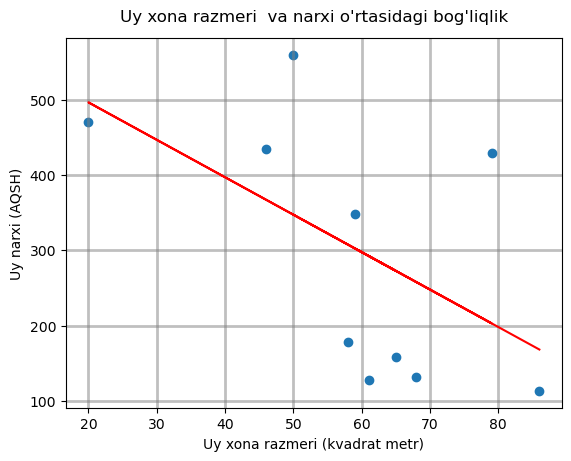

In [206]:
plt.scatter(X,y)
plt.plot(X,LR_y,c='r')
plt.title("Uy xona razmeri  va narxi o'rtasidagi bog'liqlik", size = 12, pad=12)
plt.xlabel("Uy xona razmeri (kvadrat metr)")
plt.ylabel("Uy narxi (AQSH)")
plt.grid(ls = '-', lw = 2, c = 'grey', alpha = 0.5)
plt.show()

In [126]:
bashorat = lr_model.predict(X_test)
print(bashorat)

[1631.33776596  994.36755319]


In [128]:
y_test

8    435
1    178
Name: narx, dtype: int64

In [130]:
xato = y_test - bashorat
print(xato)

8   -1196.337766
1    -816.367553
Name: narx, dtype: float64


In [132]:
my_grade = lr_model.predict([[9]])
print(my_grade)

[3595.32925532]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [134]:
y_pred = lr_model.predict(X_test)
y_pred

array([1631.33776596,  994.36755319])

In [136]:
y_test

8    435
1    178
Name: narx, dtype: int64

In [138]:
print("Intercept (Beta_0):", lr_model.intercept_)
print("Slope (Beta_1):", lr_model.coef_[0])

Intercept (Beta_0): 4073.056914893617
Slope (Beta_1): -53.08085106382978


In [140]:
natija = pd.DataFrame({"Asl": y_test, "Bashorat": y_pred})
natija

,Asl,Bashorat
8,435,1631.337766
1,178,994.367553


In [142]:
mae = mean_absolute_error(y_test, y_pred)
print("O'rtacha absalyut xato (MSE):", mae)

O'rtacha absalyut xato (MSE): 1006.3526595744684


In [144]:
# O'rtacha kvadratik xato (MSE) va R-kvadratni hisoblash
mse = mean_squared_error(y_test, y_pred)
print("O'rtacha kvadratik xato (MSE):", mse)

O'rtacha kvadratik xato (MSE): 1048840.0160799576


In [208]:
rmse = pow(mse, 1/2)
rmse

1024.1289059878925

In [210]:
r2 = r2_score(y_test, y_pred)
print("R-kvadrat (R^2):", r2)

R-kvadrat (R^2): -62.51890360671366


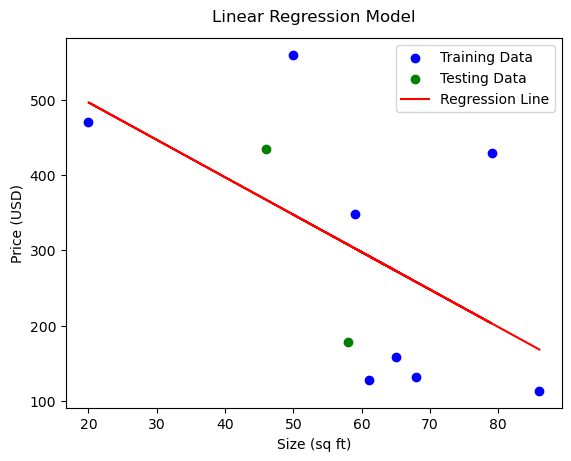

In [212]:
# Plot training data and regression line
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Testing Data")
plt.plot(X, lr_model.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression Model", pad = 12)
plt.xlabel("Size (sq ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()